$$y''=-y$$
$$y(0) = 0$$
$$y(\pi/2) = 1$$

In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
device = "cpu"

class NeuralNetworkPrueba(nn.Module):
    def __init__(self):
        super(NeuralNetworkPrueba, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits


red=NeuralNetworkPrueba().to(device)


In [21]:

puntos = torch.linspace(0,10,250, device = device)

def perdida():
    x0 =  torch.tensor([puntos[0]],device=device,requires_grad =True)
    xPi = torch.linspace(3.14159/2,1,2,device = device)
    xPi =  torch.tensor([xPi[0]],device=device,requires_grad =True)
    suma = 0
    for j in puntos:
        i = torch.tensor([j],device=device,requires_grad =True)
        y = red(i)
        yprima=torch.autograd.grad(y,i,create_graph=True)[0]
        yprimaprima=torch.autograd.grad(yprima,i,create_graph=True)[0]
        suma+=(yprimaprima+y)**2
    suma+=100*(red(x0))**2
    suma+=100*(1-red(xPi))**2
    return suma

perdida()

tensor([16.0340], grad_fn=<AddBackward0>)

In [ ]:
tempor = torch.tensor([puntos[0]],device=device,requires_grad=True)
rta = red(tempor)
#torch.autograd.functional.jacobian(outputs=red,inputs=tempor)
w=torch.autograd.grad(rta,tempor,create_graph=True)
print(w)
print(w[0])
print(w[0][0])


(tensor([0.9917], grad_fn=<SqueezeBackward1>),)
tensor([0.9917], grad_fn=<SqueezeBackward1>)
tensor(0.9917, grad_fn=<SelectBackward>)


In [31]:
learning_rate = 1e-5
epochs = 8000
optimizer = torch.optim.Adam(red.parameters(), lr=learning_rate)
#registro_perdida=[]
for i in range(epochs):
    # Compute prediction and loss
    loss = perdida()
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 10 == 0:
        print(loss.item())
    registro_perdida.append(loss.item())

0.14361532032489777
0.17600221931934357
0.14582833647727966
0.1429283171892166
0.1446009874343872
0.14312440156936646
0.14235059916973114
0.1420210748910904
0.14180657267570496
0.14153078198432922
0.14127488434314728
0.14101774990558624
0.14075727760791779
0.1404891163110733
0.14021262526512146
0.13993093371391296
0.13964557647705078
0.13935430347919464
0.13905584812164307
0.13875196874141693
0.13844360411167145
0.13812842965126038
0.13781046867370605
0.13748925924301147
0.13716250658035278
0.13682949542999268
0.1364922672510147
0.13615210354328156
0.13580957055091858
0.13545730710029602
0.13510727882385254
0.13475073873996735
0.13438978791236877
0.13402606546878815
0.1336582750082016
0.1332845389842987
0.13291035592556
0.13253253698349
0.13214930891990662
0.1317642778158188
0.1313757747411728
0.13098329305648804
0.13058826327323914
0.13018856942653656
0.12978550791740417
0.12938106060028076
0.12897270917892456
0.12856119871139526
0.12814627587795258
0.12773004174232483
0.1273087114095

KeyboardInterrupt: 

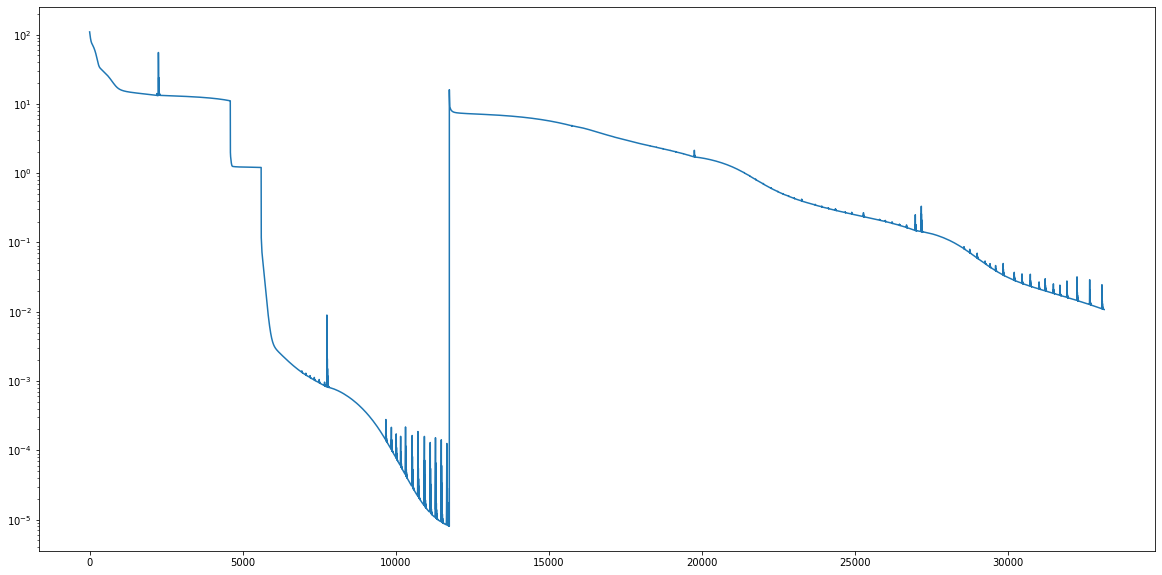

In [36]:
torch.save(red.state_dict,"intento1Seno.txt")
plt.figure(figsize = (20,10))
plt.semilogy(registro_perdida)

Los puntos deben parar cuando el gradiente llegue a un punto cercano a acero. este punto cercano a o puede ser un 100 avo del valor de lectura original del gradiente o cuando salgan del dominio. 

$$y'' = -y$$
$$y(0) = 0$$

<ipython-input-35-2b0a0cd3e7f1>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.sin(puntos.detach().numpy()),label = "referencia",LineStyle="-.")


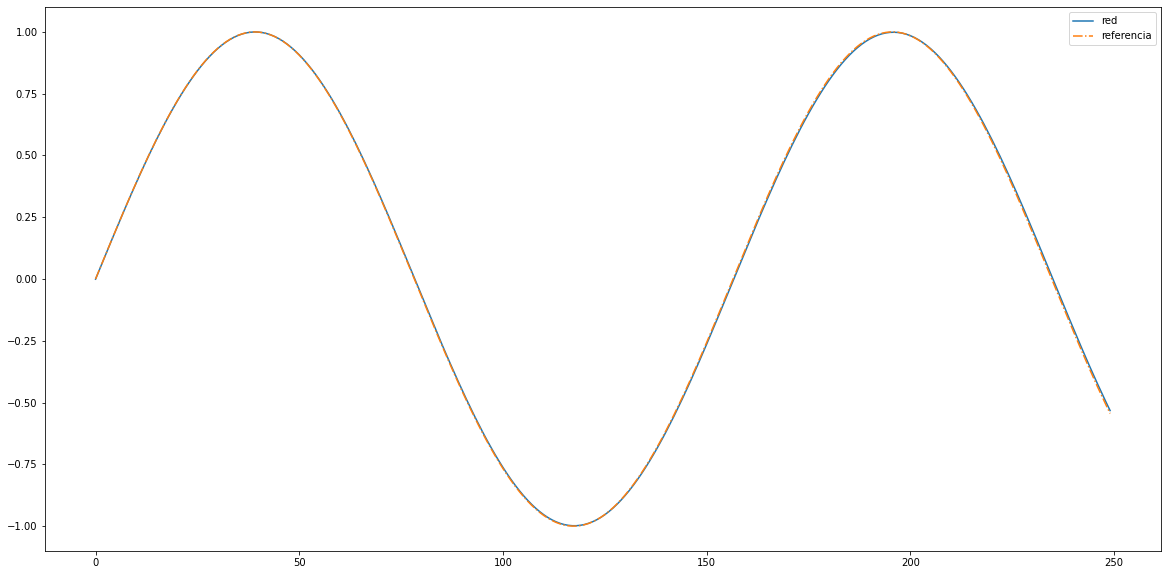

In [35]:
ygrafica = []
for i in puntos:
    ytemp=red(torch.tensor([i],device = device))
    #ygrafica.append(ytemp.cpu().detach().numpy()[0])
    ygrafica.append(ytemp.detach().numpy()[0])
import numpy as np
plt.figure(figsize = (20,10))
plt.plot(ygrafica,label = "red")
plt.plot(np.sin(puntos.detach().numpy()),label = "referencia",LineStyle="-.")
plt.legend()